In [ ]:
#import numpy and pandas
import numpy as np 
import pandas as pd 

In [ ]:
#read and analyse the adult dataset
df = pd.read_csv('/content/adult.data.csv')
print(df.head())
print(df.dtypes)
print(df.salary.unique())

   age         workclass  fnlwgt  ... hours-per-week  native-country salary
0   39         State-gov   77516  ...             40   United-States  <=50K
1   50  Self-emp-not-inc   83311  ...             13   United-States  <=50K
2   38           Private  215646  ...             40   United-States  <=50K
3   53           Private  234721  ...             40   United-States  <=50K
4   28           Private  338409  ...             40            Cuba  <=50K

[5 rows x 15 columns]
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object
['<=50K' '>50K']


In [ ]:
df.convert_dtypes()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
X = df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]
# X = X.loc[:100]
X = X.loc[:10000]
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [ ]:
# y = df.loc[:100,'salary']
y = df.loc[:10000,'salary']
y.replace('<=50K', -1, inplace = True)
y.replace('>50K',1, inplace = True)

In [ ]:
#standardizing the data
from sklearn.preprocessing import StandardScaler

#creating copies of original data to compare later
X_stand = X.copy()

# fit on data
scale = StandardScaler().fit(X_stand)

# transform the data 
X_stand = pd.DataFrame(scale.transform(X_stand))

#transformed data
X_stand.head()

,0,1,2,3,4,5
0,0.040337,-1.064736,1.147371,0.153488,-0.218974,-0.043274
1,0.849371,-1.010208,1.147371,-0.145490,-0.218974,-2.242628
2,-0.033211,0.234991,-0.422538,-0.145490,-0.218974,-0.043274
3,1.070017,0.414476,-1.207493,-0.145490,-0.218974,-0.043274
4,-0.768697,1.390122,1.147371,-0.145490,-0.218974,-0.043274


In [ ]:
#standardized data
# from sklearn.model_selection import train_test_split

#splitting X and y into train and test data
# X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.3)

# Perceptron Algorithm

In [ ]:
def perceptron_imp() -> (float,float):

  #initializing x0 as a list of column of ones
  x0 =[1]*X_train.shape[0]

  #inserting column of ones into training features
  X_train_with_x0 = X_train.copy()
  X_train_with_x0.insert(0,'x0',x0)
  # X_train_with_x0.loc[:,'x0'] = 1 #fill none values

  #initializing x0 as a list of column of ones
  x0 =[1]*X_test.shape[0]

  #inserting column of ones into test features
  X_test_with_x0 = X_test.copy()
  X_test_with_x0.insert(0,'x0',x0)
  # X_test_with_x0.loc[:,'x0'] = 1  #fill none values

  #initializing the w vector
  w = np.zeros(X_train.shape[1])

  #applying the perceptron algorithm
  for i in range(y_train.shape[0]):
    while(np.inner(w, X_train.iloc[i]) * y_train.iloc[i] <= 0):
      w = w + y_train.iloc[i]*X_train.iloc[i]

  #predicting the hypothesis line 
  y_pred_test = pd.Series(np.sign(np.inner(w, X_test)))
  y_pred_train = pd.Series(np.sign(np.inner(w, X_train)))
  #print(y_pred_test.value_counts())
  #print(y_test.value_counts())

  #resetting indices manually 
  # l = []
  # for x in range(y_test.shape[0]):
  #   l.append(x)
  # y_pred_test.index = l
  # y_test.index = l
  # l = []
  # for x in range(y_test.shape[0]):
  #   l.append(x)
  # y_pred_train.index = l
  # y_train.index = l

  y_pred_test.reset_index(drop=True,inplace=True)
  y_test.reset_index(drop=True, inplace=True)
  y_pred_train.reset_index(drop=True, inplace=True)
  y_train.reset_index(drop=True, inplace=True)

  #finding accuracy
  c1 = y_pred_test == y_test
  c2 = y_pred_train == y_train
  # print(c.value_counts())
  return c1.groupby(c1).count()[1] / y_test.shape[0] * 100, c2.groupby(c2).count()[1] / y_train.shape[0] * 100

In [ ]:
def perceptron_lib():

  #verifying the above result using library function of perceptron algorithm
  from sklearn.linear_model import Perceptron

  #model 
  lib_perceptron = Perceptron()

  #train the data
  lib_perceptron.fit(X_train, y_train)

  #predict for test data
  y_pred_lib = pd.Series(lib_perceptron.predict(X_test))

  # print(y_pred_lib.value_counts())
  # print(y_test.value_counts())
  # y_pred_lib.index = l
  # c = y_pred_lib == y_test
  # print(c.value_counts())

  #returning test and train accuracy
  return lib_perceptron.score(X_test, y_test)*100, lib_perceptron.score(X_train, y_train)*100

# Logistic Regression

In [ ]:
def logregClassifier():

  from sklearn.linear_model import LogisticRegression
  logres = LogisticRegression()
  logres.fit(X_train, y_train)
  # y_pred_lib = pd.Series(logres.predict(X_test))
  # print(y_pred_lib.value_counts())
  # print(y_test.value_counts())

  # y_pred_lib.index = l
  # y_test.index = l
  # c = y_pred_lib == y_test
  # print("Accuracy of Logistic Regression :", c.value_counts()[1] / len(y_test)*100)   #This formula is correct for finding accuracy.
  # print(logres.predict_proba(X_test))

  #returning test and train accuracy
  return logres.score(X_test, y_test)*100, logres.score(X_train, y_train)*100

#SGD Classifier

In [ ]:
def sgdClassifier():

  from sklearn.linear_model import SGDClassifier
  clf = SGDClassifier(loss='log')
  clf.fit(X_train, y_train)
  # y_pred_lib = pd.Series(clf.predict(X_test))
  # print(y_pred_lib.value_counts())
  # print(y_test.value_counts())

  # y_pred_lib.index = l
  # y_test.index = l
  # c = y_pred_lib == y_test
  # print("Accuracy of Logistic Regression :", c.value_counts()[1] / len(y_test)*100)   #This formula is correct for finding accuracy.
  # print(logres.predict_proba(X_test))

    #returning test and train accuracy
  return clf.score(X_test, y_test)*100, clf.score(X_train, y_train)*100

# SVM

In [ ]:
def svm_linear_50():

  from sklearn import svm

  #using svc with linear kernel
  svc = svm.SVC(kernel = 'linear', C=50)  #C=100
  c = svc.C

  #train data
  svc.fit(X_train, y_train)

  #number of support vectors
  print('Number of Support Vectors for SVM Linear with C=50 :',svc.n_support_)

  #predict test data
  # y_pred = svc.predict(X_test)

  #returning test and train accuracy
  return svc.score(X_test, y_test)*100, svc.score(X_train, y_train)*100

In [ ]:
# def svm_linear_10():

#   from sklearn import svm

#   #using svc with linear kernel
#   svc = svm.SVC(kernel = 'linear', C=10)
#   c = svc.C
#   #train data
#   svc.fit(X_train, y_train)

#   #number of support vectors
#   print('Number of Support Vectors for SVM Linear with C=10 :',svc.n_support_)

#   #predict test data
#   # y_pred = svc.predict(X_test)
#   return svc.score(X_test, y_test)*100

In [ ]:
# def svm_linear_1():

#   from sklearn import svm

#   #using svc with linear kernel
#   svc = svm.SVC(kernel = 'linear', C=1)
#   c = svc.C
#   #train data
#   svc.fit(X_train, y_train)

#   #number of support vectors
#   print('Number of Support Vectors for SVM Linear with C=1 :',svc.n_support_)

#   #predict test data
#   # y_pred = svc.predict(X_test)
#   return svc.score(X_test, y_test)*100

In [ ]:
# def svm_linear_dot1():

#   from sklearn import svm

#   #using svc with linear kernel
#   svc = svm.SVC(kernel = 'linear', C=0.1)
#   c = svc.C

#   #train data
#   svc.fit(X_train, y_train)

#   #number of support vectors
#   print('Number of Support Vectors for SVM Linear with C=0.1:',svc.n_support_)

#   #predict test data
#   # y_pred = svc.predict(X_test)
#   return svc.score(X_test, y_test)*100

In [ ]:
# def svm_linear_dot01():

#   from sklearn import svm

#   #using svc with linear kernel
#   svc = svm.SVC(kernel = 'linear', C=0.01)
#   c = svc.C

#   #train data
#   svc.fit(X_train, y_train)

#   #number of support vectors
#   print('Number of Support Vectors for SVM Linear with C=0.01:',svc.n_support_)

#   #predict test data
#   # y_pred = svc.predict(X_test)
#   return svc.score(X_test, y_test)*100

In [ ]:
# def svm_linear_dot001():

#   from sklearn import svm

#   #using svc with linear kernel
#   svc = svm.SVC(kernel = 'linear', C=0.001)
#   c = svc.C

#   #train data
#   svc.fit(X_train, y_train)

#   #number of support vectors
#   print('Number of Support Vectors for SVM Linear with C=0.001:',svc.n_support_)

#   #predict test data
#   # y_pred = svc.predict(X_test)
#   return svc.score(X_test, y_test)*100

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

crange = [x*0.001 for x in range(1, 100, 10)]+[x*0.001 for x in range(22, 32)]+[0.0001, 0.1, 1, 5, 10, 50]
crange.sort()
parameters = {'kernel': ('linear',), 'C':crange}
svc = svm.SVC()
gscv = GridSearchCV(svc, parameters, refit=True)

def svm_linear():
  svc.fit(X_train, y_train)

  gscv.fit(X_train, y_train)

  c = gscv.best_params_['C']

  #number of support vectors
  print(f'Number of Support Vectors for SVM Linear with C={c}:',svc.n_support_)
  # print(gscv.score(X_test, y_test))
  # print(gscv.score(X_train, y_train))

  # print(gscv.best_params_)

  # print(gscv.best_score_)

  # print(pd.Series(gscv.cv_results_['mean_test_score'], index=crange))

  #return test and train accuracies 
  return gscv.score(X_test, y_test)*100, gscv.score(X_train, y_train)*100

In [ ]:
def svm_poly_1():

  from sklearn import svm

  #using svc with polynomial kernel 
  svc = svm.SVC(kernel = 'poly', )

  #train data
  svc.fit(X_train, y_train)

  #number of support vectors
  print('Number of Support Vectors for SVM Polynomial with C=1 :',svc.n_support_)

  #predict test data
  # y_pred = svc.predict(X_test)

  #return test and train accuracies 
  return svc.score(X_test, y_test)*100, svc.score(X_train, y_train)*100
  # , svc.n_support_

In [ ]:
def svm_gaussian_1():

  from sklearn import svm

  #using svc with gaussian kernel
  svc = svm.SVC(kernel = 'rbf')

  #train data
  svc.fit(X_train, y_train)

  #number of support vectors
  print('Number of Support Vectors for SVM Gaussian with C=1:',svc.n_support_)

  #predict test data
  # y_pred = svc.predict(X_test)

  #return test and train accuracies
  return svc.score(X_test, y_test)*100, svc.score(X_train, y_train)*100

In [ ]:
from sklearn.model_selection import train_test_split

#declaring output list
d = [[None]*6]*3

#column list
algos = ['Perceptron','Logistic Regression','Logistic Regression using SGD', 'SVM using Polynomial Kernel','SVM using Gaussian Kernel', 'SVM using Linear Kernel']

#index for output dataframe
idx_out_df = pd.Index(['90:10', '80:20', '70:30'], name='Train-test split')

#packing all into dataframe
out_df_test = pd.DataFrame(d, columns=algos, dtype = np.float64, index =idx_out_df)
out_df_train = pd.DataFrame(d, columns=algos, dtype = np.float64, index =idx_out_df)

#index for output dataframe
# idx_n_support = pd.Index(['SVM usinge Linear Kernel', 'SVM using Polynomial Kernel','SVM using Gaussian Kernel'])

#number of support vectors dataframe
# n_support_df = pd.DataFrame(columns=['class 1', 'class 2'], index = idx_n_support)

#lists for future use
l_algo = [perceptron_imp, logregClassifier, sgdClassifier, svm_poly_1, svm_gaussian_1, svm_linear]

for i in range(1, 4): #loop for different train-test splits

  print("="*45+f"{(10-i)*10}:{i*10}"+"="*45)
 

  for j in range(5):
    sum_test = 0 #take total of 20 iterations
    sum_train = 0 #take total of 20 iterations
    for itr in range(20):  #every algo runs 20 times
      #splitting X and y into train and test data
      X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size= i/10)
      accuracies = l_algo[j]()
      sum_test += accuracies[0]
      sum_train += accuracies[1]
    out_df_test.iloc[i-1,j] = round(sum_test/20,2)
    out_df_train.iloc[i-1,j] = round(sum_train/20,2)

  #entering linear SVM separately
  accuracies = l_algo[5]()
  out_df_test.iloc[i-1,5] = accuracies[0]
  out_df_train.iloc[i-1,5] = accuracies[1]

  # for itr in range(20):  #every algo runs 20 times
  #     l[j].append(perceptron_imp())
  #     logres_list.append(logregClassifier())
  #     sgd_list.append(sgdClassifier())
  #     svm_linear_list.append(svm_linear_dot001())  
  #     svm_poly_list.append(svm_poly_1())
  #     svm_gaussian_list.append(svm_gaussian_1())

=============================================90:10=============================================
Number of Support Vectors for SVM Polynomial with C=1 : [1815 1796]
Number of Support Vectors for SVM Polynomial with C=1 : [1834 1825]
Number of Support Vectors for SVM Polynomial with C=1 : [1828 1818]
Number of Support Vectors for SVM Polynomial with C=1 : [1806 1791]
Number of Support Vectors for SVM Polynomial with C=1 : [1832 1818]
Number of Support Vectors for SVM Polynomial with C=1 : [1793 1782]
Number of Support Vectors for SVM Polynomial with C=1 : [1812 1798]
Number of Support Vectors for SVM Polynomial with C=1 : [1806 1791]
Number of Support Vectors for SVM Polynomial with C=1 : [1802 1796]
Number of Support Vectors for SVM Polynomial with C=1 : [1814 1801]
Number of Support Vectors for SVM Polynomial with C=1 : [1843 1830]
Number of Support Vectors for SVM Polynomial with C=1 : [1815 1801]
Number of Support Vectors for SVM Polynomial with C=1 : [1826 1812]
Number of Support Ve

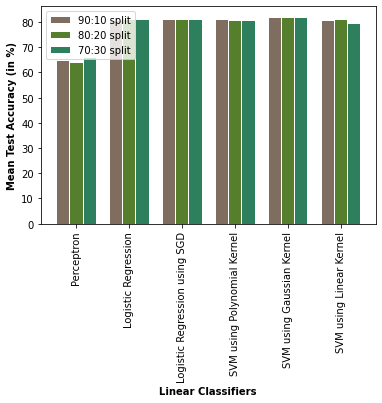

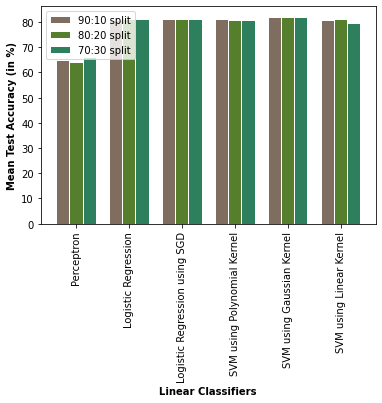

In [ ]:
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25

#assign rows of out_df_test dataframe to each of the variables 
bar1 = list(out_df_test.iloc[0])
bar2 = list(out_df_test.iloc[1])
bar3 = list(out_df_test.iloc[2])

# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bar1, color='#7f6d5f', width=barWidth, edgecolor='white', label='90:10 split')
plt.bar(r2, bar2, color='#557f2d', width=barWidth, edgecolor='white', label='80:20 split')
plt.bar(r3, bar3, color='#2d7f5e', width=barWidth, edgecolor='white', label='70:30 split')
 
# Add xticks on the middle of the group bars
plt.xlabel('Linear Classifiers', fontweight='bold')
plt.ylabel('Mean Test Accuracy (in %)',  fontweight='bold')
plt.xticks([r + barWidth for r in r1], ['Perceptron','Logistic Regression','Logistic Regression using SGD', 'SVM using Polynomial Kernel','SVM using Gaussian Kernel', 'SVM using Linear Kernel'], rotation='vertical')

# Create legend & Show graphic
plt.legend()
plt.show()



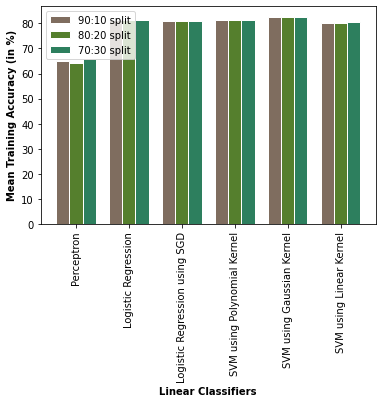

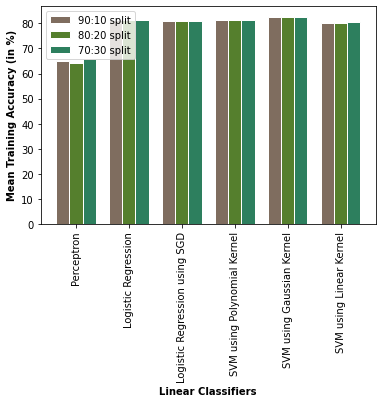

In [ ]:
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25

#assign rows of out_df_train dataframe to each of the variables 
bar1 = list(out_df_train.iloc[0])
bar2 = list(out_df_train.iloc[1])
bar3 = list(out_df_train.iloc[2])

# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bar1, color='#7f6d5f', width=barWidth, edgecolor='white', label='90:10 split')
plt.bar(r2, bar2, color='#557f2d', width=barWidth, edgecolor='white', label='80:20 split')
plt.bar(r3, bar3, color='#2d7f5e', width=barWidth, edgecolor='white', label='70:30 split')
 
# Add xticks on the middle of the group bars
plt.xlabel('Linear Classifiers', fontweight='bold')
plt.ylabel('Mean Training Accuracy (in %)',  fontweight='bold')
plt.xticks([r + barWidth for r in r1], ['Perceptron','Logistic Regression','Logistic Regression using SGD', 'SVM using Polynomial Kernel','SVM using Gaussian Kernel', 'SVM using Linear Kernel'], rotation='vertical')

# Create legend & Show graphic
plt.legend()
plt.show()



In [ ]:
crange = [round(x,4) for x in crange]

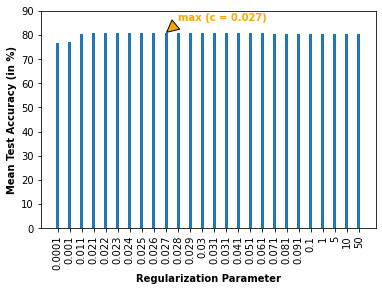

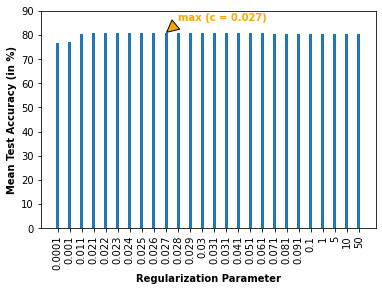

In [ ]:
#plotting c versus accuracy for linear svm

#assign accuracy values to bar
y_data = gscv.cv_results_['mean_test_score']
bar = [x*100 for x in y_data]

# Set position of bar on X axis
r = np.arange(len(bar))

#Make the plot
plt.bar(r, bar, width=barWidth)

#finding c corresponding to max value
ymax = max(bar)
xpos = bar.index(ymax)
xmax = r[xpos]

# Add xticks on the bars
plt.xlabel('Regularization Parameter', fontweight='bold')
plt.ylabel('Mean Test Accuracy (in %)',  fontweight='bold')
plt.xticks(r, labels=crange, rotation='vertical')
plt.ylim(top = 90)

#add annotation to max value
plt.annotate(f'max (c = {crange[xpos]})', (xmax,ymax), (xmax+1, ymax+5), arrowprops=dict(facecolor='orange', shrink=0.05), fontvariant='small-caps', fontweight='bold', color='orange')

#Show graphic
plt.show()
